In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Unnamed: 0     TV  Radio  Newspaper  Sales
0         False  False  False      False  False
1         False  False  False      False  False
2         False  False  False      False  False
3         False  False  False      False  False
4         False  False  False      False  False
..          ...    ...    ...        ...    ...
195       False  False  False      False  False
196       False  False  False      False  False
197       False  False  False      False  False
198       False  False  False      False  False
199       False  False  False      False  False

[200 rows x 5 columns]>

## **Data** ***Visualisation*** 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

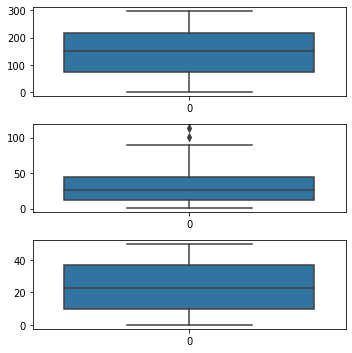

In [ ]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(df['TV'], ax=axs[0])
plt2=sns.boxplot(df['Newspaper'], ax=axs[1])
plt3=sns.boxplot(df['Radio'], ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

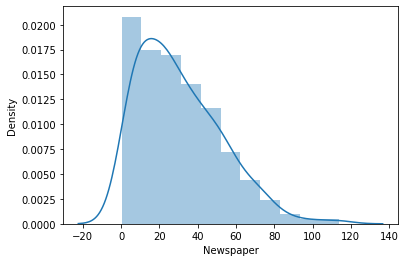

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr= df.Newspaper.quantile(0.75)- df.Newspaper.quantile(0.25)


In [ ]:
lower_bridge=df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge=df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data =df.copy()

In [ ]:
data.loc[data["Newspaper"]>=93, "Newspaper"]=93

<Axes: >

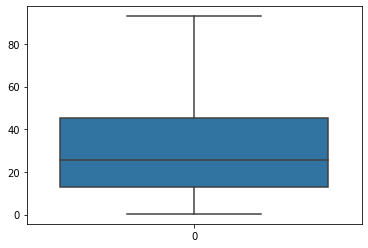

In [ ]:
sns.boxplot(data["Newspaper"])

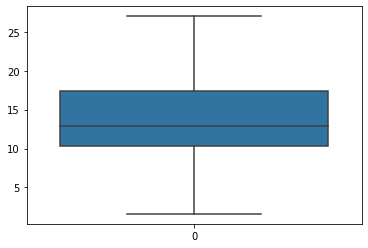

In [ ]:
sns.boxplot(data["Sales"]);

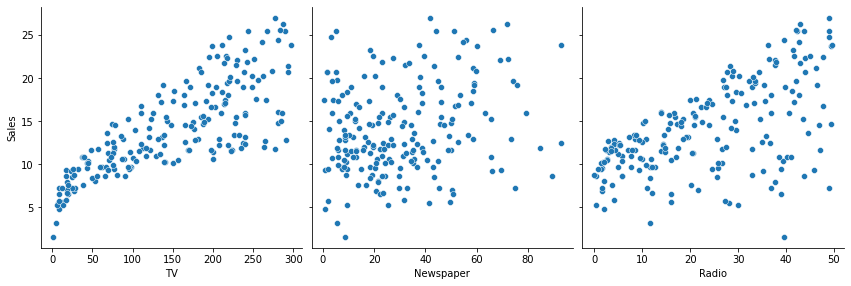

In [ ]:

sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

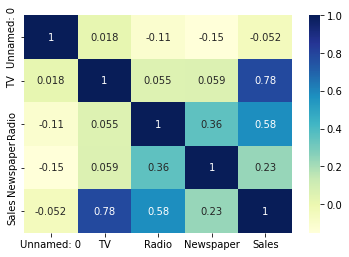

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
important_features= list(df.corr()["Sales"][(df.corr()["Sales"]>+0.5)|(df.corr()["Sales"]<-0.5)].index)


In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x=data['TV']
y=data['Sales']

In [ ]:
X=x.values.reshape(-1,1)

## **Splitting Training And Testing Data**

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


##***Model Training***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)


In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)

In [ ]:
knn_test_pred = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[14.42 15.18 12.1   6.68 16.18 17.58 20.54 17.76  9.34 11.3  17.76 10.2
 14.5  16.38  9.38 17.64 14.36 14.36 14.4   9.8  12.14 11.14  7.22  5.38
 16.06 19.9  20.7  11.76 14.18 15.06 18.9  19.36 15.92 18.9  10.36 15.06
 20.78 16.06 13.38 11.14 12.08  5.38  7.22 11.52 16.06 12.1  20.02 20.7
 15.92 20.02 18.9  12.26 15.28 12.54 12.1  14.5  16.18 14.5  13.38 15.92
 11.98  9.72 15.06 14.84 20.54  9.12 19.36 12.1   9.8  17.44 12.54 18.9
 15.92 17.84 14.02  6.68 10.36  9.8  20.96 19.34  7.22 20.38 16.76 16.4
  9.72 18.52  8.46 20.38  6.18 16.06 12.4  17.54 17.78  7.22 16.34 20.78
 16.06 10.2  14.5  14.36 11.3   8.46 20.38 18.52 14.18 16.4  12.4  11.52
 12.54  7.22 14.92 16.64 20.02 15.38 20.8  17.54 13.78  8.46 10.12 19.34
  6.12  9.34 14.6  17.76 11.14 19.9  16.88 16.76 18.9   6.12 15.1  17.18
 11.3  20.36] [11.3  15.32 13.78 15.18 15.18 13.78 15.18 17.82  7.22 14.5  21.62 16.18
  5.38 12.54 15.92 17.58 17.44  9.68 17.76 13.78 17.82 14.5  17.32 20.6
 11.98 11.98 12.1  12.08 16.32 20.6   7.22

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5335355316001607
RMSE: 3.4477194922107133


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.666265,0.533536,3.447719,0.132729


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)


In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    7.481341
x1       0.046059
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     189.4
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.82e-27
Time:                        05:18:07   Log-Likelihood:                -352.65
No. Observations:                 134   AIC:                             709.3
Df Residuals:                     132   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4813      0.579     12.917      0.0

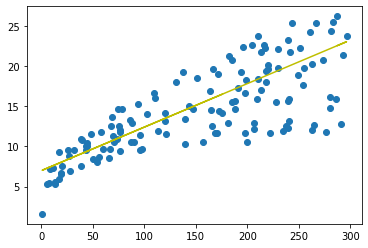

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()


In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

112   -1.473877
105    5.367147
117   -1.600236
108   -2.784712
23    -2.496571
         ...   
56    -2.317571
3      4.040747
53     5.308317
34    -2.389171
183    5.472140
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([15.57387706, 13.83285344, 11.00023564,  8.08471195, 17.99657131,
       20.22581849, 19.17107138, 17.63731247, 10.12972383, 11.80626509,
       17.72482424,  9.46647673, 13.90654756, 18.28213603, 10.22644736,
       16.48123594, 12.53860043, 14.2658064 , 12.68138279,  9.23157672,
       10.86205916, 10.60412973,  8.34264138,  7.73005899, 18.52624781,
       18.61375958, 17.31029481, 10.73309445, 15.37121823, 15.10868292,
       19.51651257, 17.18593597, 16.65165359, 19.774442  ,  9.54017085,
       15.05801821, 19.03750078, 18.5032184 , 13.03142987, 10.52582973,
       11.08314152,  7.51358251,  8.37488255, 10.63176503, 18.5308537 ,
       10.99562976, 20.87064206, 17.31490069, 16.58256535, 20.97197148,
       19.59020669, 12.21158276, 15.32055352, 11.54833567, 10.94035916,
       13.51965342, 18.0518419 , 13.8973358 , 13.01761222, 16.58256535,
       11.97207687,  9.94548852, 15.00274762, 16.92340067, 19.2447655 ,
        8.93219435, 17.19054186, 11.00023564,  9.30066496, 16.40

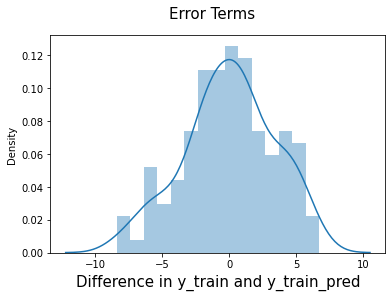

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

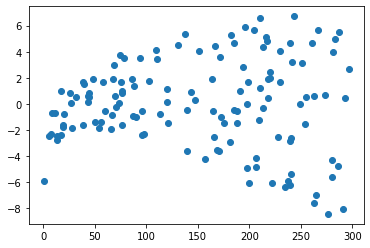

In [ ]:
plt.scatter(X_train, res)
plt.show()
     

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([11.82008274, 16.8082536 , 14.38095347, 13.75455344, 13.89272991,
       14.37634759, 13.66704167, 17.9459066 ,  8.30579431, 13.94339462,
       20.57586557, 17.98275367,  7.67018252, 11.6450592 , 16.68389477,
       20.23503026, 16.37990652,  9.18091201, 17.72482424, 13.15118281,
       17.88142425, 13.98945345, 17.79851836, 17.37017128, 12.10564746,
       11.95825922, 10.94957093, 11.17525918, 15.63375354, 17.40241246,
        8.34724726, 21.00421265, 13.44135342,  8.57754139,  7.87744723,
       17.6281007 , 13.27093576, 18.17159485, 12.29909453, 12.53860043,
       17.54519482, 13.70849461, 18.45255369,  8.63741786, 18.92235372,
       20.82458323, 15.54624177, 12.42805925, 18.41570663,  8.63281198,
       13.54728872, 15.63375354, 10.95878269,  8.79862375, 16.15882415,
       16.88194772, 10.35080619, 19.71456552, 12.82416515,  8.25973549,
       16.64244183,  7.86823547,  7.84060017, 15.01195939, 10.65940033,
       12.87943574])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.017651656989862

In [ ]:
r2 = r2_score(y_test, y_pred)
r2


0.6426507040925256

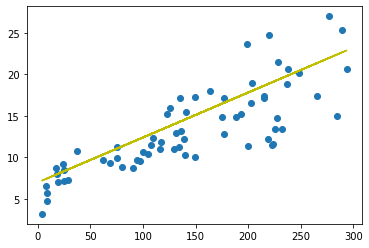

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()